In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irtnm8210","key":"f33d1836fab13cf31dbe2f90a6e6351b"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c classification-of-plants-of-southeast-asia

100% 3.81G/3.81G [02:14<00:00, 30.3MB/s]
100% 3.81G/3.81G [02:14<00:00, 30.4MB/s]


In [4]:
import zipfile
from pathlib import Path

!pwd
!ls

UNZIPPED_DATAPATH = Path("/content")

IMAGE_PATH = UNZIPPED_DATAPATH / "Bali26"

if IMAGE_PATH.is_dir():
  print(f"The {IMAGE_PATH} directory exists")
else:
  print(f"The {IMAGE_PATH} directory not found, creating one...")
  IMAGE_PATH.mkdir(parents=True, exist_ok=True)
  # Unzip Bali26 dataset
  with zipfile.ZipFile(UNZIPPED_DATAPATH / "classification-of-plants-of-southeast-asia.zip", "r") as zip_ref:
    print("Unzipping Bali26 dataset...") 
    zip_ref.extractall(path=IMAGE_PATH)
    print("Finish!")

/content
classification-of-plants-of-southeast-asia.zip	kaggle.json  sample_data
The /content/Bali26 directory not found, creating one...
Unzipping Bali26 dataset...
Finish!


Random image path: /content/Bali26/bali-26_test/bali-26_test/3733.jpg
Image class: bali-26_test
Image height: 1080
Image width: 1920


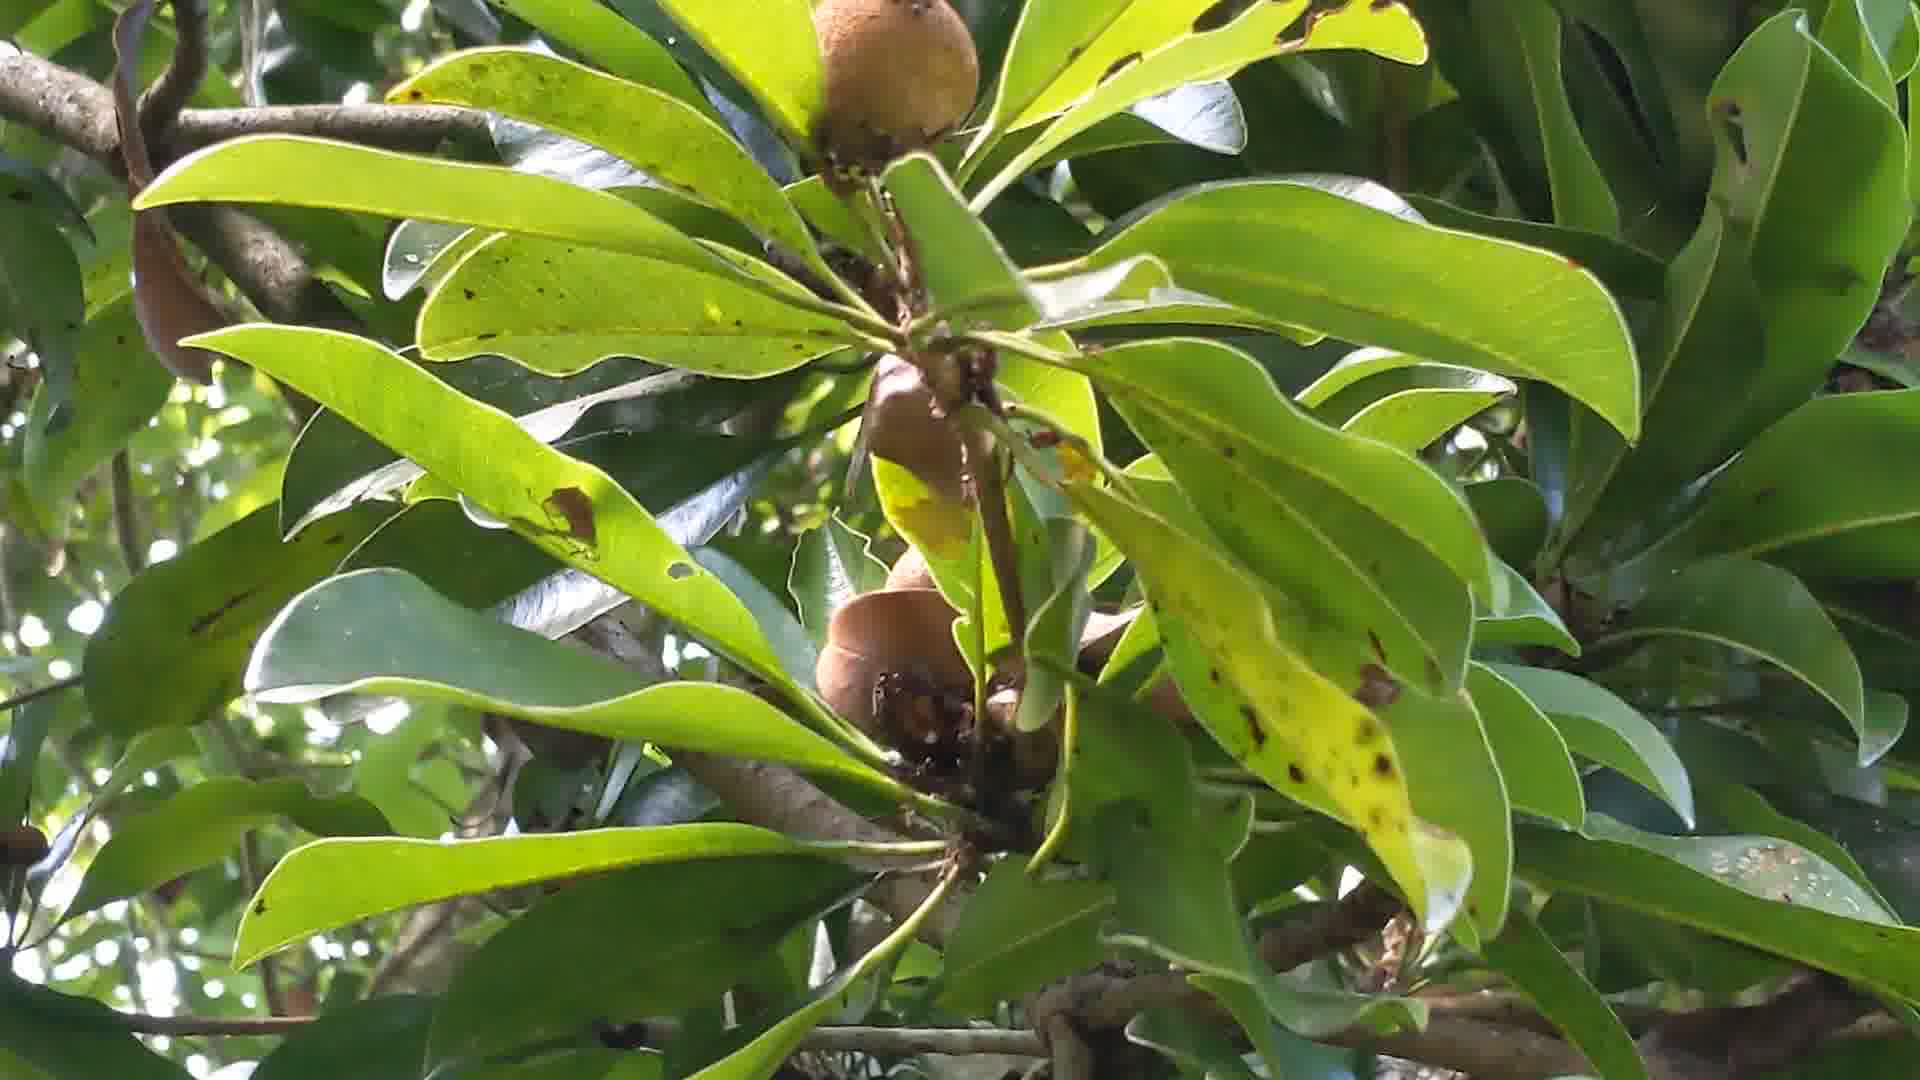

In [5]:
val_dir = IMAGE_PATH / "bali-26_train" / "bali-26_train"
test_dir = IMAGE_PATH / "bali-26_test" / "bali-26_test"

import random
from PIL import Image

# Set seed
random.seed(1) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(test_dir.glob("*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [6]:
from torchvision import datasets, transforms

test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [31]:
val_data = datasets.ImageFolder(root=IMAGE_PATH / "bali-26_train" / "bali-26_train", # target folder of images
                            transform=test_transforms, # transforms to perform on data (images)
                            target_transform=None) # transforms to perform on labels (if necessary)

print(f"Dataset:\n{val_data}")

Dataset:
Dataset ImageFolder
    Number of datapoints: 41607
    Root location: /content/Bali26/bali-26_train/bali-26_train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [8]:
class_names = val_data.classes
class_names

['bamboo',
 'banana',
 'cacao',
 'cinnamon',
 'coffeearabica',
 'dragonfruit',
 'durian',
 'frangipani',
 'guava',
 'jackfruit',
 'lychee',
 'mango',
 'mangosteen',
 'nilam',
 'papaya',
 'passiflora',
 'sawo',
 'snakefruit',
 'starfruit',
 'sugarpalm',
 'suweg',
 'taro',
 'vanilla',
 'waterguava',
 'whitepepper',
 'zodia']

In [9]:
class_to_idx = val_data.class_to_idx
class_to_idx

{'bamboo': 0,
 'banana': 1,
 'cacao': 2,
 'cinnamon': 3,
 'coffeearabica': 4,
 'dragonfruit': 5,
 'durian': 6,
 'frangipani': 7,
 'guava': 8,
 'jackfruit': 9,
 'lychee': 10,
 'mango': 11,
 'mangosteen': 12,
 'nilam': 13,
 'papaya': 14,
 'passiflora': 15,
 'sawo': 16,
 'snakefruit': 17,
 'starfruit': 18,
 'sugarpalm': 19,
 'suweg': 20,
 'taro': 21,
 'vanilla': 22,
 'waterguava': 23,
 'whitepepper': 24,
 'zodia': 25}

In [10]:
# import required module
import os
 
# iterate over files in
# that directory
for filename in os.listdir(test_dir):
    f = os.path.join(test_dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)

/content/Bali26/bali-26_test/bali-26_test/802.jpg
/content/Bali26/bali-26_test/bali-26_test/3735.jpg
/content/Bali26/bali-26_test/bali-26_test/506.jpg
/content/Bali26/bali-26_test/bali-26_test/882.jpg
/content/Bali26/bali-26_test/bali-26_test/279.jpg
/content/Bali26/bali-26_test/bali-26_test/1741.jpg
/content/Bali26/bali-26_test/bali-26_test/1297.jpg
/content/Bali26/bali-26_test/bali-26_test/1002.jpg
/content/Bali26/bali-26_test/bali-26_test/3648.jpg
/content/Bali26/bali-26_test/bali-26_test/4501.jpg
/content/Bali26/bali-26_test/bali-26_test/3332.jpg
/content/Bali26/bali-26_test/bali-26_test/49.jpg
/content/Bali26/bali-26_test/bali-26_test/3991.jpg
/content/Bali26/bali-26_test/bali-26_test/1948.jpg
/content/Bali26/bali-26_test/bali-26_test/359.jpg
/content/Bali26/bali-26_test/bali-26_test/1455.jpg
/content/Bali26/bali-26_test/bali-26_test/1916.jpg
/content/Bali26/bali-26_test/bali-26_test/1025.jpg
/content/Bali26/bali-26_test/bali-26_test/4445.jpg
/content/Bali26/bali-26_test/bali-26_t

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
from torchsummary import summary
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.models import efficientnet_b7, EfficientNet_B7_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"
CHANNELS, HEIGHT, WIDTH = 3, 224, 224
BATCH_SIZE = 32
pretrained_model = torchvision.models.efficientnet_b7(weights=None)

# TRANSFER LEARNING
pretrained_model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=2560, out_features=26)
)
# PUT ALL TENSORS TO DEVICE
pretrained_model.to(device)

# MODEL SUMMARY
print(summary(model=pretrained_model, input_size=(CHANNELS, HEIGHT, WIDTH), batch_size=BATCH_SIZE, device=device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 112, 112]           1,728
       BatchNorm2d-2         [32, 64, 112, 112]             128
              SiLU-3         [32, 64, 112, 112]               0
            Conv2d-4         [32, 64, 112, 112]             576
       BatchNorm2d-5         [32, 64, 112, 112]             128
              SiLU-6         [32, 64, 112, 112]               0
 AdaptiveAvgPool2d-7             [32, 64, 1, 1]               0
            Conv2d-8             [32, 16, 1, 1]           1,040
              SiLU-9             [32, 16, 1, 1]               0
           Conv2d-10             [32, 64, 1, 1]           1,088
          Sigmoid-11             [32, 64, 1, 1]               0
SqueezeExcitation-12         [32, 64, 112, 112]               0
           Conv2d-13         [32, 32, 112, 112]           2,048
      BatchNorm2d-14         [32, 32, 1

In [13]:
PATH = "/content/gdrive/MyDrive/Temp Pytorch/EfficientNetB7/efficientnetb7_bestweights.pth"

In [37]:
# Loading last checkpoint
checkpoint = torch.load(PATH, map_location=torch.device('cpu'))

# Model
pretrained_model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [32]:
from torch.utils.data import random_split

SPLIT_RATIO = 0.05
DATASET_SIZE = len(val_data)
VAL_SIZE = int(DATASET_SIZE * 0.05)
TRAIN_SIZE = DATASET_SIZE - VAL_SIZE

_, val_data = random_split(dataset=val_data, lengths=[TRAIN_SIZE, VAL_SIZE])

In [33]:
import os
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

val_dataloader = DataLoader(dataset=val_data, 
                            batch_size=BATCH_SIZE, 
                            shuffle=True, 
                            num_workers=NUM_WORKERS - 1,
                            timeout=20)

In [34]:
# Let's check out what we've created
print(f"Dataloaders: {val_dataloader}")
print(f"Length of test dataloader: {len(val_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7fce42ba72d0>
Length of test dataloader: 65 batches of 32


In [17]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 14.6 MB/s 


In [44]:
from torchmetrics import Accuracy

def val_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              accuracy_fn):
    val_loss, val_acc = 0, 0
    # Put model and accuracy function on the same device
    model, accuracy_fn = model.to(device), accuracy_fn.to(device)
    # Put model in evaluation mode
    model.eval()
    batch = 1
    with torch.no_grad():
        for X, y in data_loader:
            print(f"Batch {batch}")
            # Put data in the same device
            y = y.type(torch.LongTensor)
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            y_preds = model(X)
            # Calculating accumulative loss
            loss = loss_fn(y_preds, y)
            val_loss += loss
            val_acc += accuracy_fn(y_preds, y)
            batch += 1
        # Calculating loss on batch
        val_loss /= len(data_loader)
        val_acc /= len(data_loader)
        print(f"Val loss: {val_loss:.5f} | Val accuracy: {val_acc * 100:.2f}%")
        
    return val_loss, val_acc

In [40]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def training_timer(start: float, end: float, device: torch.device = None):
    total_training_time = end - start
    print(f"Training time: {total_training_time:.3f} seconds")
    return total_training_time

In [45]:
# Loss function
loss_fn = torch.nn.CrossEntropyLoss()
# Start timer
start = timer()
val_loss, val_acc = val_step(model=pretrained_model, data_loader=val_dataloader,
                                    loss_fn=loss_fn, 
                                    accuracy_fn=Accuracy(num_classes=26),
                                    device=device)

# End timer
end = timer()
validation_time = training_timer(start=start, end=end, device=device)

Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16
Batch 17
Batch 18
Batch 19
Batch 20
Batch 21
Batch 22
Batch 23
Batch 24
Batch 25
Batch 26
Batch 27
Batch 28
Batch 29
Batch 30
Batch 31
Batch 32
Batch 33
Batch 34
Batch 35
Batch 36
Batch 37
Batch 38
Batch 39
Batch 40
Batch 41
Batch 42
Batch 43
Batch 44
Batch 45
Batch 46
Batch 47
Batch 48
Batch 49
Batch 50
Batch 51
Batch 52
Batch 53
Batch 54
Batch 55
Batch 56
Batch 57
Batch 58
Batch 59
Batch 60
Batch 61
Batch 62
Batch 63
Batch 64
Batch 65
Val loss: 0.08599 | Val accuracy: 98.17%
Training time: 935.114 seconds


In [46]:
def get_image_path(directory):
  image_filenames = []
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image_filenames.append(f)
  
  return image_filenames

In [47]:
image_filenames = get_image_path(test_dir)
len(image_filenames)

4624

In [48]:
import PIL
from torchvision import transforms

def imagepath2tensor(image_path: str, transforms: torchvision.transforms) -> torch.Tensor:
  img = PIL.Image.open(fp=image_path)
  tensor_values = transforms(img)

  return tensor_values

In [49]:
test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

first_image = imagepath2tensor(image_path=image_filenames[0], transforms=test_transforms)
first_image
second_image = imagepath2tensor(image_path="/content/Bali26/bali-26_train/bali-26_train/bamboo/1.jpg", transforms=test_transforms)

In [50]:
# EXPERIMENT
result = torch.argmax(input=pretrained_model(second_image.unsqueeze(dim=0)), dim=1)
print(result.item())

0


In [51]:
from IPython.display import display, Image

def predict_image(image_filename: str, model: torch.nn.Module, transforms: torchvision.transforms):
  image_tensor = imagepath2tensor(image_path=image_filename, transforms=transforms)
  result = torch.argmax(input=model(image_tensor.unsqueeze(dim=0)), dim=1)
  return class_names[result.item()]

In [56]:
print(predict_image(image_filename="/content/Bali26/bali-26_train/bali-26_train/banana/1927.jpg", model=pretrained_model, transforms=test_transforms))

banana


In [57]:
image_filenames[0]

'/content/Bali26/bali-26_test/bali-26_test/802.jpg'

In [58]:
# EXPERIMENT
sample_filename = image_filenames[0]
print(image_filenames[0].replace("/content/Bali26/bali-26_test/bali-26_test/", ""))

802.jpg


In [59]:
def string_filter(image_filename: str, pattern: str="/content/Bali26/bali-26_test/bali-26_test/"):
  return image_filename.replace(pattern, "")

In [60]:
def create_submission_data(model: torch.nn.Module, test_dir: str, transforms: torchvision.transforms=test_transforms):
  image_filenames = get_image_path(test_dir)
  id, predicted_categories = [], []
  counter = 0
  for image_filename in image_filenames:
    print(f"Image: {image_filename}\nTotal count: {counter}")
    image_tensor = imagepath2tensor(image_path=image_filename, transforms=transforms)
    result = predict_image(image_filename=image_filename, model=model, transforms=transforms)
    predicted_categories.append(result)
    id.append(string_filter(image_filename=image_filename))
    counter += 1
  
  return id, predicted_categories

In [61]:
ids, categories = create_submission_data(model=pretrained_model, test_dir=test_dir)
print(ids)

Streaming output truncated to the last 5000 lines.
Total count: 2124
Image: /content/Bali26/bali-26_test/bali-26_test/1611.jpg
Total count: 2125
Image: /content/Bali26/bali-26_test/bali-26_test/2443.jpg
Total count: 2126
Image: /content/Bali26/bali-26_test/bali-26_test/3438.jpg
Total count: 2127
Image: /content/Bali26/bali-26_test/bali-26_test/1156.jpg
Total count: 2128
Image: /content/Bali26/bali-26_test/bali-26_test/2138.jpg
Total count: 2129
Image: /content/Bali26/bali-26_test/bali-26_test/920.jpg
Total count: 2130
Image: /content/Bali26/bali-26_test/bali-26_test/1294.jpg
Total count: 2131
Image: /content/Bali26/bali-26_test/bali-26_test/2811.jpg
Total count: 2132
Image: /content/Bali26/bali-26_test/bali-26_test/3549.jpg
Total count: 2133
Image: /content/Bali26/bali-26_test/bali-26_test/4503.jpg
Total count: 2134
Image: /content/Bali26/bali-26_test/bali-26_test/3220.jpg
Total count: 2135
Image: /content/Bali26/bali-26_test/bali-26_test/3660.jpg
Total count: 2136
Image: /content/Bali

In [63]:
import pandas as pd

submission = pd.DataFrame({"id": ids,
                           "category": categories})
submission.to_csv("/content/sample_data/submission.csv", index=False, header=True)